import libraries

In [67]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

load the kap_dim to merge them later on NAME_LATIN

In [2]:
kap_dim = gpd.read_file('../data/oriaprokapodistriakwnota/oria_prokapodistriakwn_ota/oria_prokapodistriakwn_ota_WGS84_ALL.shp')\
                [['NAME_LATIN','HubDist','hubdist_2', 'hubdist_3','oiki_densi', 'medianpopu','geometry']]\
                .rename(columns={'HubDist':'dist_coast','hubdist_2':'dist_beach','hubdist_3':'dist_city', 'medianpopu':'pop_densi'})

In [3]:
kap_dim.head()

,NAME_LATIN,dist_coast,dist_beach,dist_city,oiki_densi,pop_densi,geometry
0,K. SKALAS VRVPOY_1,0.00589,0.09695,0.17829,0.14515,3711.0,"POLYGON ((23.75101429971932 38.33518802431447,..."
1,K. NEVN PALATIVN_1,0.00055,0.06213,0.21335,0.30373,3647.0,"POLYGON ((23.76508710930473 38.32550627741894,..."
2,K. SYKAMINOY,0.03027,0.11387,0.19576,0.28702,3647.0,"POLYGON ((23.68491052299799 38.32400248539284,..."
3,K. MARKOPOYLOY VRVPOY,0.07166,0.09610,0.27729,0.17024,3770.5,"POLYGON ((23.83593913761958 38.31217132561655,..."
4,K. NEVN PALATIVN_2,0.00055,0.06213,0.21335,1.20787,3647.0,"POLYGON ((23.72745967508806 38.32690290685498,..."


load the cleaned spitogatos data

In [4]:
new_ns_frame = pd.read_csv('df_resolute_CLEANED_4IQR.csv')
new_ns_frame.sample()

,NAME_LATIN,Area_sqm,PropertyTy,Bedrooms,Bathrooms,Rooms,Levels,PriceEuro,PricePerM2,ModifiedOn,Year,Month,Day
56886,D. KORYDALLOY,98,Apartment,2,1,0,0,110000,1122.0,2019-04-25,2019,4,Thursday


In [5]:
len(new_ns_frame)

78133

merge them

In [6]:
points_geo = pd.merge(new_ns_frame, kap_dim, on='NAME_LATIN')

In [86]:
points_geo.sample()

,NAME_LATIN,Area_sqm,PropertyTy,Bedrooms,Bathrooms,Rooms,Levels,PriceEuro,PricePerM2,ModifiedOn,Year,Month,Day,dist_coast,dist_beach,dist_city,oiki_densi,pop_densi,geometry
37437,D. PERISTERIOY,330,Land Plot,0,0,0,0,165000,500.0,2019-02-28,2019,2,Thursday,0.08819,0.16664,0.05396,0.09352,77452.5,"POLYGON ((23.66942116490461 38.03422464328589,..."


### save to csv 

In [89]:
# pd.DataFrame(points_geo.drop(columns='geometry')).to_csv('df_resolute_CLEANED_4IQR_4PREP.csv', index=False)

### per name find the avg price and area 

In [9]:
name_latin_price_area = points_geo[['PricePerM2','Area_sqm','NAME_LATIN']].groupby('NAME_LATIN').mean()\
                                                    .reset_index()

In [12]:
# name_latin_price_area.to_csv('name_latin_price_area.csv', index=False)

In [11]:
name_latin_price_area.sort_values('Area_sqm', ascending=False).head()

,NAME_LATIN,PricePerM2,Area_sqm
507,K. KORVNEIAS,10.0,2600.0
710,K. TYLISOY,27.0,2580.0
372,K. BAMBAKIAS,6.0,2500.0
245,D. SIATISTHS,1.0,2200.0
486,K. KATV BASILIKVN,2.0,2075.0


In [13]:
NAME_LATIN_meanPricePerM2 = pd.DataFrame(points_geo["PricePerM2"].groupby(points_geo['NAME_LATIN']).mean())
NAME_LATIN_meanPriceEuro = pd.DataFrame(points_geo["PriceEuro"].groupby(points_geo['NAME_LATIN']).mean())

In [14]:
NAME_LATIN_meanPricePerM2.sort_values('PricePerM2', ascending=False).head()

,PricePerM2
NAME_LATIN,
K. SXOINOYSSHS (NHSOS)_1,4643.000000
D. MYKONIVN (NHSOS MYKONOS)_1,4015.019672
D. BOYLIAGMENHS_1,3380.666667
K. OIAS,2791.529880
K. APOLLVNIAS (NHSOS SIFNOS)_1,2729.566372


In [56]:
# NAME_LATIN_meanPriceEuro.sort_values('PriceEuro', ascending=False).head()

### time analysis

In [48]:
points_geo.Year.unique()

array([2019, 2018, 2016, 2017, 2015, 2010, 2014, 2012, 2009, 2011, 2013])

In [52]:
points_geo_ts = points_geo.set_index('ModifiedOn').sort_index()
points_geo_ts.index = pd.to_datetime(points_geo_ts.index)

In [50]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 5)})

In [76]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['PriceEuro', 'PricePerM2']
# Resample to weekly frequency, aggregating with mean
points_geo_ts_monthly_mean = points_geo_ts[data_columns].resample('M').mean()
points_geo_ts_monthly_mean.head(3)

,PriceEuro,PricePerM2
ModifiedOn,,
2009-05-31,180000.0,1385.0
2009-06-30,NaN,NaN
2009-07-31,NaN,NaN


In [77]:
# points_geo_ts_monthly_mean['PricePerM2'].loc['2016-01-01':'2019-04-30'].plot(linewidth=1,grid=True)

Text(0, 0.5, 'PricePerM2')

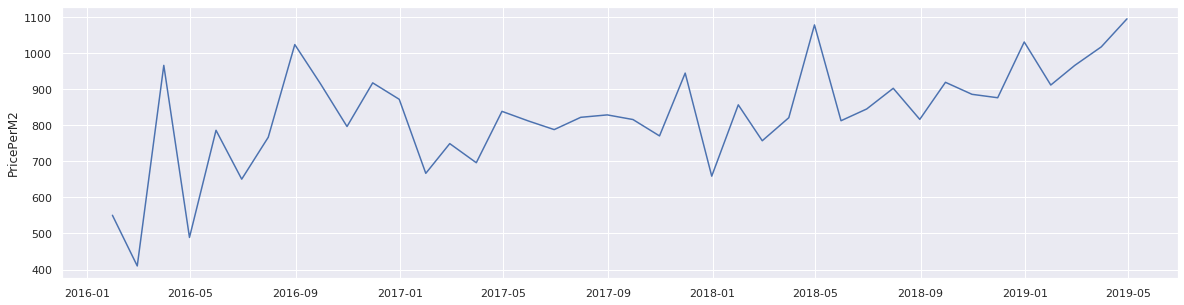

In [78]:
# Start and end of the date range to extract
start, end = '2016-01-01', '2019-04-30'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(points_geo_ts_monthly_mean['PricePerM2'].loc[start:end])

ax.set_ylabel('PricePerM2')

In [79]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
points_geo_ts_monthly = points_geo_ts[data_columns].resample('M').sum()
points_geo_ts_monthly.head(3)

,PriceEuro,PricePerM2
ModifiedOn,,
2009-05-31,180000,1385.0
2009-06-30,0,0.0
2009-07-31,0,0.0


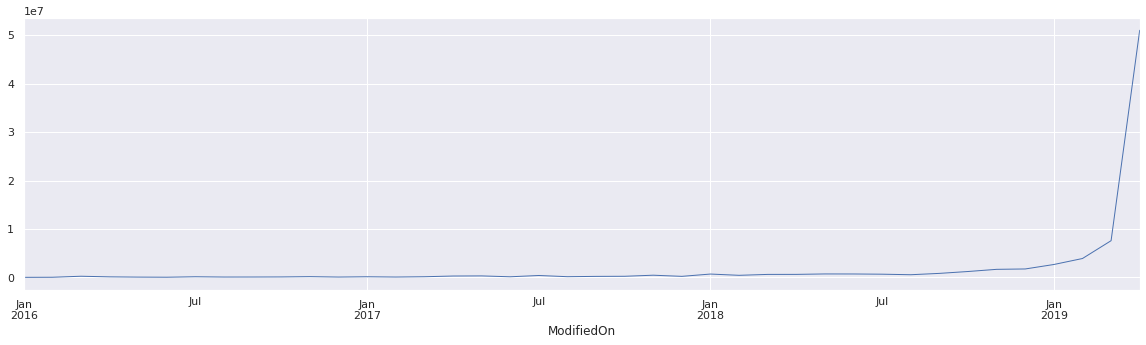

In [84]:
points_geo_ts_monthly['PricePerM2'].loc['2016-01-01':'2019-04-30'].plot(linewidth=1,grid=True)